<a href="https://colab.research.google.com/github/aricidecarte/VKR/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импорт библиотек

In [314]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Activation, Dropout, LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.neural_network import MLPRegressor
from keras.callbacks import EarlyStopping, ModelCheckpoint

from pandas.plotting import scatter_matrix




In [102]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
x_bp=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/X_bp.xlsx', index_col=0)
x_nup=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/X_nup.xlsx', index_col=0)

In [104]:
x = x_bp.merge(x_nup, left_index=True,right_index=True, how='inner')

Шаг 1. Знакомство с данными

In [105]:
x.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0.0                         1.857143            2030.0             738.736842   
1.0                         1.857143            2030.0             738.736842   
2.0                         1.857143            2030.0             738.736842   
3.0                         1.857143            2030.0             738.736842   
4.0                         2.771331            2030.0             753.000000   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0.0                        30.00                        22.267857   
1.0                        50.00                        23.750000   
2.0                        49.90                        33.000000   
3.0                       129.00                        21.250000   
4.0                       111.86                        22.267857   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0.0                100.000000                          210.0   
1.0                284.615385                          210.0   
2.0                284.615385                          210.0   
3.0                300.000000                          210.0   
4.0                284.615385                          210.0   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0.0                                  70.0                         3000.0   
1.0                                  70.0                         3000.0   
2.0                                  70.0                         3000.0   
3.0                                  70.0                         3000.0   
4.0                                  70.0                         3000.0   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
0.0                    220.0                 0.0          4.0   
1.0                    220.0                 0.0          4.0   
2.0                    220.0                 0.0          4.0   
3.0                    220.0                 0.0          5.0   
4.0                    220.0                 0.0          5.0   

     Плотность нашивки  
0.0               57.0  
1.0               60.0  
2.0               70.0  
3.0               47.0  
4.0               57.0

In [106]:
x_bp.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10)
memory usage: 120.2 KB


Проверка на дубликаты.

In [107]:
x.duplicated().sum()

0

Проверка на наличие пропусков.

In [108]:
x.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

 Количество уникальных значений в каждом признаке.

In [109]:
x.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

Описательная статистика.

In [110]:
x.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1023.000000       1023.000000   
mean                          2.930366       1975.734888   
std                           0.913222         73.729231   
min                           0.389403       1731.764635   
25%                           2.317887       1924.155467   
50%                           2.906878       1977.621657   
75%                           3.552660       2021.374375   
max                           5.591742       2207.773481   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1023.000000                  1023.000000   
mean              739.923233                   110.570769   
std               330.231581                    28.295911   
min                 2.436909                    17.740275   
25%               500.047452                    92.443497   
50%               739.664328                   110.564840   
75%               961.812526                   129.730366   
max              1911.536477                   198.953207   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1023.000000               1023.000000   
mean                         22.244390                285.882151   
std                           2.406301                 40.943260   
min                          14.254985                100.000000   
25%                          20.608034                259.066528   
50%                          22.230744                285.896812   
75%                          23.961934                313.002106   
max                          33.000000                413.273418   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1023.000000                           1023.000000   
mean                      482.731833                             73.328571   
std                       281.314690                              3.118983   
min                         0.603740                             64.054061   
25%                       266.816645                             71.245018   
50%                       451.864365                             73.268805   
75%                       693.225017                             75.356612   
max                      1399.542362                             82.682051   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                    1023.000000              1023.000000   
mean                     2466.922843               218.423144   
std                       485.628006                59.735931   
min                      1036.856605                33.803026   
25%                      2135.850448               179.627520   
50%                      2459.524526               219.198882   
75%                      2767.193119               257.481724   
max                      3848.436732               414.590628   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count         1023.000000  1023.000000        1023.000000  
mean            44.252199     6.899222          57.153929  
std             45.015793     2.563467          12.350969  
min              0.000000     0.000000           0.000000  
25%              0.000000     5.080033          49.799212  
50%              0.000000     6.916144          57.341920  
75%             90.000000     8.586293          64.944961  
max             90.000000    14.440522         103.988901

In [111]:
x_nup.head()

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0.0                 0.0          4.0               57.0
1.0                 0.0          4.0               60.0
2.0                 0.0          4.0               70.0
3.0                 0.0          5.0               47.0
4.0                 0.0          5.0               57.0

In [112]:
x.head(20)

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0.0                          1.857143            2030.0   
1.0                          1.857143            2030.0   
2.0                          1.857143            2030.0   
3.0                          1.857143            2030.0   
4.0                          2.771331            2030.0   
5.0                          2.767918            2000.0   
6.0                          2.569620            1910.0   
7.0                          2.561475            1900.0   
8.0                          3.557018            1930.0   
9.0                          3.532338            2100.0   
10.0                         2.919678            2160.0   
11.0                         2.877358            1990.0   
12.0                         1.598174            1950.0   
13.0                         2.919678            1980.0   
14.0                         4.029126            1910.0   
15.0                         2.934783            2030.0   
16.0                         3.557018            1880.0   
17.0                         4.193548            1950.0   
18.0                         4.897959            1890.0   
19.0                         3.532338            1980.0   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0.0              738.736842                        30.00   
1.0              738.736842                        50.00   
2.0              738.736842                        49.90   
3.0              738.736842                       129.00   
4.0              753.000000                       111.86   
5.0              748.000000                       111.86   
6.0              807.000000                       111.86   
7.0              535.000000                       111.86   
8.0              889.000000                       129.00   
9.0             1421.000000                       129.00   
10.0             933.000000                       129.00   
11.0            1628.000000                       129.00   
12.0             827.000000                       129.00   
13.0             568.000000                       129.00   
14.0             800.000000                       129.00   
15.0             302.000000                       129.00   
16.0             313.000000                       129.00   
17.0             506.000000                       129.00   
18.0             540.000000                       129.00   
19.0            1183.000000                       111.86   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0.0                         22.267857                100.000000   
1.0                         23.750000                284.615385   
2.0                         33.000000                284.615385   
3.0                         21.250000                300.000000   
4.0                         22.267857                284.615385   
5.0                         22.267857                284.615385   
6.0                         22.267857                284.615385   
7.0                         22.267857                284.615385   
8.0                         21.250000                300.000000   
9.0                         21.250000                300.000000   
10.0                        21.250000                300.000000   
11.0                        21.250000                300.000000   
12.0                        21.250000                300.000000   
13.0                        21.250000                300.000000   
14.0                        21.250000                300.000000   
15.0                        21.250000                300.000000   
16.0                        21.250000                300.000000   
17.0                        21.250000                300.000000   
18.0                        21.250000                300.000000   
19.0                        22.267857                284.615385   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0.0                 

Гистограммы распределения переменных, диаграммы размаха "ящик с усами".

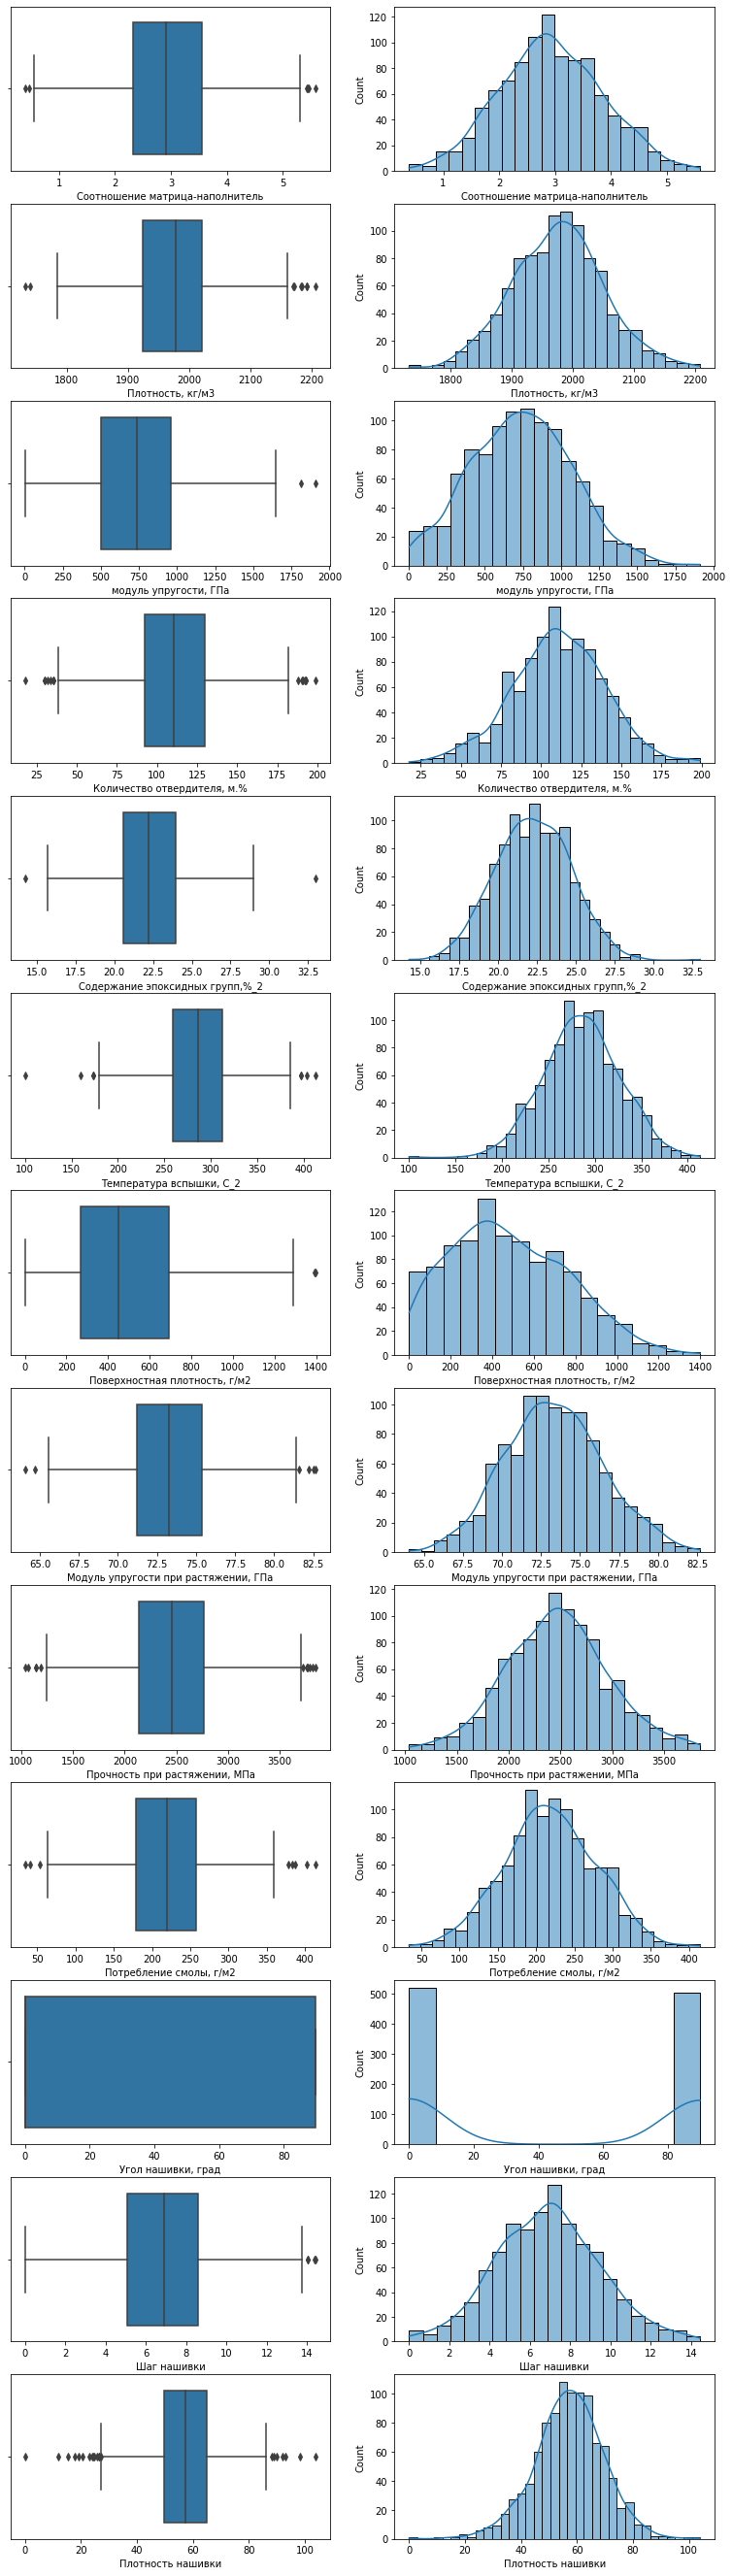

In [113]:
fig, axes = plt.subplots(13, 2, figsize=(13, 48))
for p, column in enumerate(x.columns):    
    sns.boxplot(data=x, x=column, ax=axes[p, 0])
    sns.histplot(data=x, x=column, kde=True, ax=axes[p, 1])
plt.show()

Корреляционная матрица.

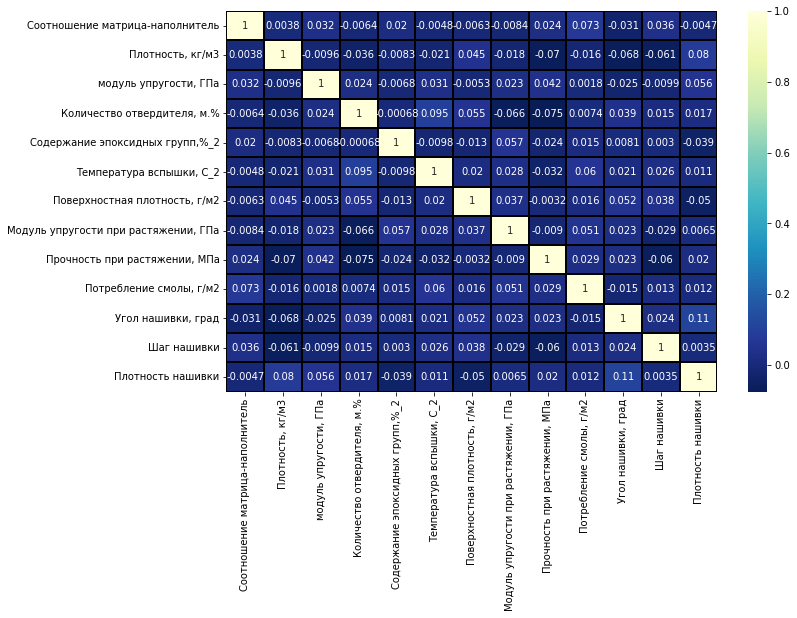

In [114]:
plt.figure(figsize = (11, 7))
sns.heatmap(x.corr(), cmap = "YlGnBu_r", annot = True, linewidths=1, linecolor='black')

Коэффициент корреляции близок к 0, соотвественно отсутствует линейная зависимость.


Попарные графики рассеивания.

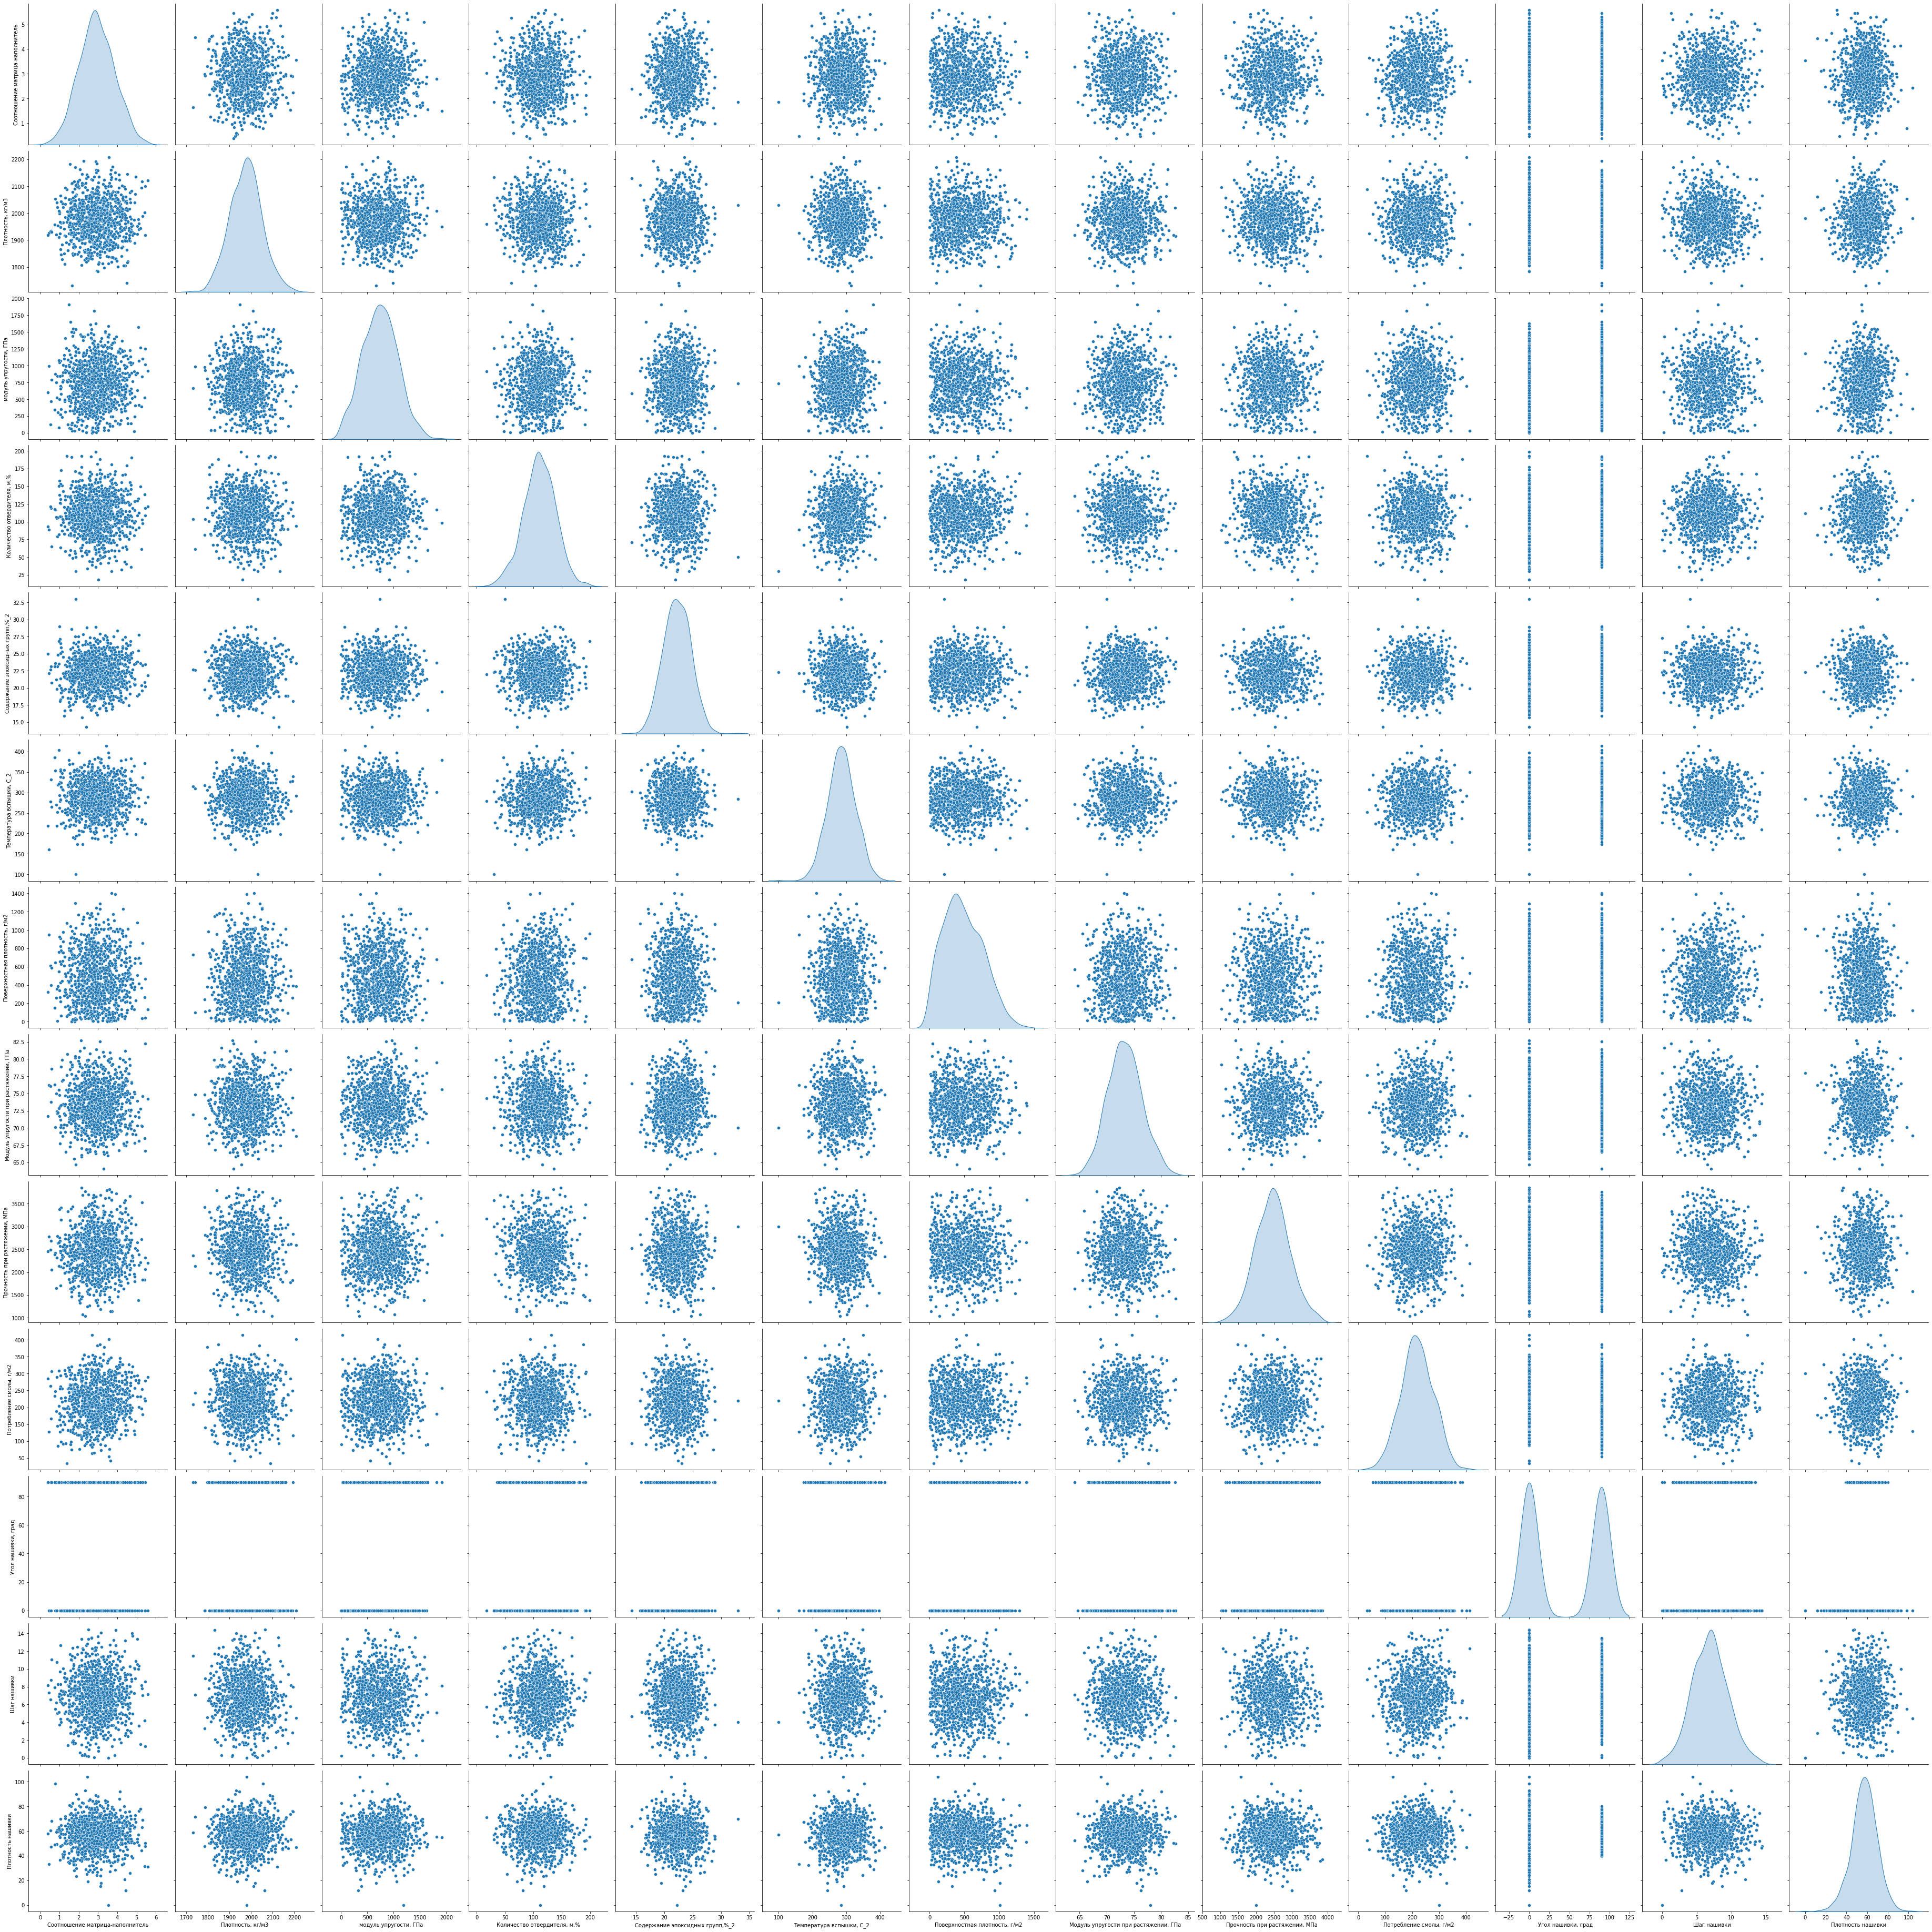

In [115]:
sns.pairplot(x, height=4, diag_kind='kde');

Шаг 2. Нормализация

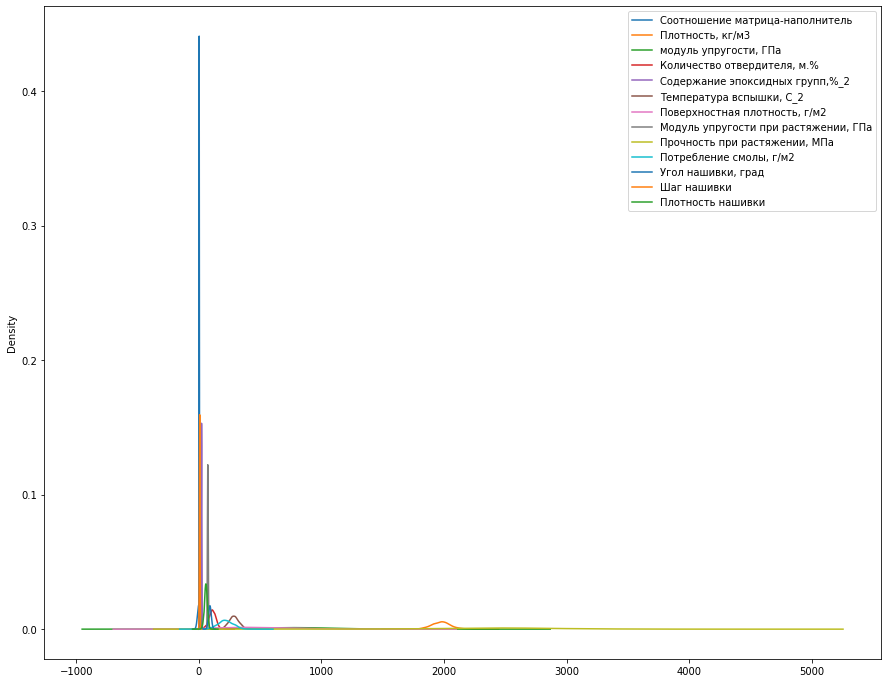

In [116]:
fig, ax = plt.subplots(figsize=(15, 12))
x.plot(kind='kde', ax=ax)

Данные находятся в разных диапозонах. Следовательно требудется провести нормализацию данных.

Исключим выбросы.

In [117]:
for col in x.columns:
    q75,q25 = np.percentile(x.loc[:,col],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    x.loc[x[col] < min,col] = np.nan
    x.loc[x[col] > max,col] = np.nan

In [118]:
x.isnull().sum()

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64

Удалим выбросы.

In [119]:
x = x.dropna(axis=0)

In [120]:
x.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [121]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 936 entries, 1.0 to 1022.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       936 non-null    float64
 1   Плотность, кг/м3                      936 non-null    float64
 2   модуль упругости, ГПа                 936 non-null    float64
 3   Количество отвердителя, м.%           936 non-null    float64
 4   Содержание эпоксидных групп,%_2       936 non-null    float64
 5   Температура вспышки, С_2              936 non-null    float64
 6   Поверхностная плотность, г/м2         936 non-null    float64
 7   Модуль упругости при растяжении, ГПа  936 non-null    float64
 8   Прочность при растяжении, МПа         936 non-null    float64
 9   Потребление смолы, г/м2               936 non-null    float64
 10  Угол нашивки, град                    936 non-null    float64
 11  Шаг нашивки 

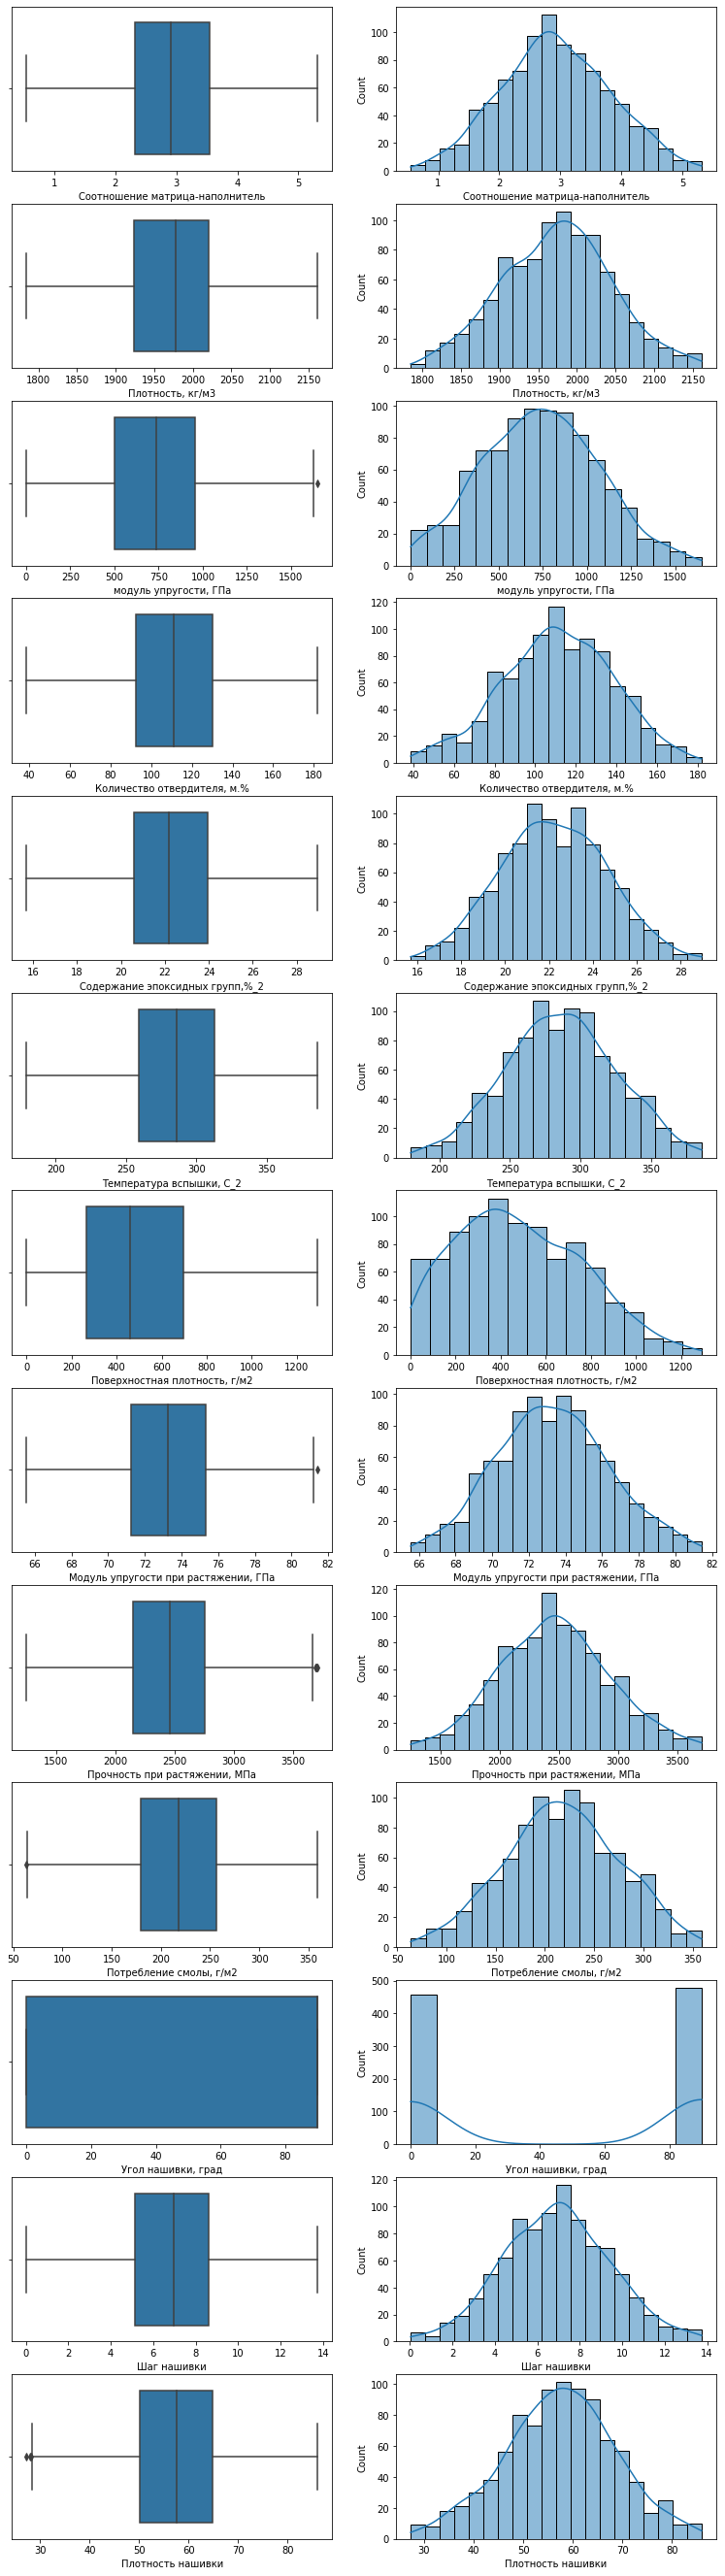

In [122]:
fig, axes = plt.subplots(13, 2, figsize=(13, 48))
for p, column in enumerate(x.columns):    
    sns.boxplot(data=x, x=column, ax=axes[p, 0])
    sns.histplot(data=x, x=column, kde=True, ax=axes[p, 1])
plt.show()
    

Нормализация значений. Метод MinMaxScaler

In [123]:
scaler = MinMaxScaler()
x_norm = pd.DataFrame(scaler.fit_transform(x),
            columns=x.columns, index=x.index) 

In [190]:
x_norm.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                       936.000000        936.000000   
mean                          0.498933          0.502695   
std                           0.187489          0.187779   
min                           0.000000          0.000000   
25%                           0.372274          0.368517   
50%                           0.494538          0.511229   
75%                           0.629204          0.624999   
max                           1.000000          1.000000   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count             936.000000                   936.000000   
mean                0.446764                     0.504664   
std                 0.199583                     0.188865   
min                 0.000000                     0.000000   
25%                 0.301243                     0.376190   
50%                 0.447061                     0.506040   
75%                 0.580446                     0.637978   
max                 1.000000                     1.000000   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                       936.000000                936.000000   
mean                          0.491216                  0.516059   
std                           0.180620                  0.190624   
min                           0.000000                  0.000000   
25%                           0.367716                  0.386128   
50%                           0.489382                  0.515980   
75%                           0.623410                  0.646450   
max                           1.000000                  1.000000   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                     936.000000                            936.000000   
mean                        0.373733                              0.488647   
std                         0.217078                              0.191466   
min                         0.000000                              0.000000   
25%                         0.205619                              0.359024   
50%                         0.354161                              0.485754   
75%                         0.538683                              0.615077   
max                         1.000000                              1.000000   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                     936.000000               936.000000   
mean                        0.495706                 0.521141   
std                         0.188915                 0.195781   
min                         0.000000                 0.000000   
25%                         0.365149                 0.392067   
50%                         0.491825                 0.523766   
75%                         0.612874                 0.652447   
max                         1.000000                 1.000000   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count          936.000000   936.000000         936.000000  
mean             0.511752     0.502232           0.513776  
std              0.500129     0.183258           0.191342  
min              0.000000     0.000000           0.000000  
25%              0.000000     0.372211           0.390482  
50%              1.000000     0.504258           0.516029  
75%              1.000000     0.624604           0.638842  
max              1.000000     1.000000           1.000000

Шаг 3. Построение моделей.



In [191]:
x_upr = x_norm.drop(['Модуль упругости при растяжении, ГПа'], axis=1)
x_pr = x_norm.drop(['Прочность при растяжении, МПа'], axis=1)
y_upr = x_norm[['Модуль упругости при растяжении, ГПа']]
y_pr = x_norm[['Прочность при растяжении, МПа']]

X_train_upr, X_test_upr, y_train_upr, y_test_upr = train_test_split(x_upr, y_upr, test_size=0.3, random_state=1)
X_train_pr, X_test_pr, y_train_pr, y_test_pr = train_test_split(x_pr, y_pr, test_size=0.3, random_state=1)

In [192]:
models = pd.DataFrame()

Линейная регрессия

In [193]:
lin_reg = LinearRegression()
lin_reg_params = {
    'fit_intercept' : ['True', 'False']
}
gscv_lin_reg_upr = GridSearchCV(lin_reg, lin_reg_params, n_jobs=-1, cv=10)
gscv_lin_reg_upr.fit(X_train_upr, y_train_upr)
gscv_lin_reg_upr.best_params_

{'fit_intercept': 'True'}

In [194]:
lin_reg_upr = gscv_lin_reg_upr.best_estimator_
print(f'R2-score LR для модуля упругости при растяжении: {lin_reg_upr.score(X_test_upr, y_test_upr).round(4)}')

R2-score LR для модуля упругости при растяжении: -0.0213


In [195]:
lin_reg_upr_result = pd.DataFrame({
   'Model': 'LinearRegression_upr',
   'MAE': mean_absolute_error(y_test_upr, lin_reg_upr.predict(X_test_upr).round(4)),
   'rmse': (np.sqrt(mean_squared_error(y_test_upr, lin_reg_upr.predict(X_test_upr))).round(4)), 
   'R2 score': lin_reg_upr.score(X_test_upr, y_test_upr).round(4),
    'max_error': max_error(y_test_upr, lin_reg_upr.predict(X_test_upr).round(4))
}, index=['Модуль упругости при растяжении'])

In [196]:
models = models.append(lin_reg_upr_result)
models

Model       MAE    rmse  \
Модуль упругости при растяжении  LinearRegression_upr  0.160519  0.1949   

                                 R2 score  max_error  
Модуль упругости при растяжении   -0.0213   0.492539

In [197]:
gscv_lin_reg_pr = GridSearchCV(lin_reg, lin_reg_params, n_jobs=-1, cv=10)
gscv_lin_reg_pr.fit(X_train_pr, y_train_pr)
gscv_lin_reg_pr.best_params_

{'fit_intercept': 'True'}

In [198]:
lin_reg_pr = gscv_lin_reg_pr.best_estimator_
print(f'R2-score LR для прочности при растяжении: {lin_reg_pr.score(X_test_pr, y_test_pr).round(4)}')

R2-score LR для прочности при растяжении: -0.0205


In [199]:
lin_reg_pr_result = pd.DataFrame({
   'Model': 'LinearRegression_pr',
   'MAE': mean_absolute_error(y_test_pr, lin_reg_pr.predict(X_test_upr).round(4)),
   'rmse': (np.sqrt(mean_squared_error(y_test_pr, lin_reg_pr.predict(X_test_pr))).round(4)), 
   'R2 score': lin_reg_pr.score(X_test_pr, y_test_pr).round(4),
   'max_error': max_error(y_test_pr, lin_reg_pr.predict(X_test_pr).round(4))
}, index=['Прочность при растяжении'])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Прочность при растяжении, МПа
Feature names seen at fit time, yet now missing:
- Модуль упругости при растяжении, ГПа

  warnings.warn(message, FutureWarning)


In [200]:
models = models.append(lin_reg_pr_result)
models

Model       MAE    rmse  \
Модуль упругости при растяжении  LinearRegression_upr  0.160519  0.1949   
Прочность при растяжении          LinearRegression_pr  0.154218  0.1872   

                                 R2 score  max_error  
Модуль упругости при растяжении   -0.0213   0.492539  
Прочность при растяжении          -0.0205   0.571600

Метод К ближайших соседей



In [238]:
knn = KNeighborsRegressor()
knn_params = {'n_neighbors' : range(1, 301, 2), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
GSCV_knn_upr = GridSearchCV(knn, knn_params, n_jobs=-1, cv=10)
GSCV_knn_upr.fit(X_train_upr, y_train_upr)
GSCV_knn_upr.best_params_

{'algorithm': 'auto', 'n_neighbors': 59, 'weights': 'uniform'}

In [240]:
knn_upr = GSCV_knn_upr.best_estimator_
print(f'R2-score k-NN для модуля упругости при растяжении: {knn_upr.score(X_test_upr, y_test_upr).round(4)}')

R2-score k-NN для модуля упругости при растяжении: -0.0046


In [243]:
models = pd.DataFrame()

In [249]:
knn_upr_result = pd.DataFrame({
   'Model': 'KNeighborsRegressor_upr', 
   'MAE': mean_absolute_error(y_test_upr, knn_upr.predict(X_test_upr)), 
   'R2 score': knn_upr.score(X_test_upr, y_test_upr).round(4)
}, index=['Модуль упругости при растяжении'])


In [244]:
models = pd.concat([models, knn_upr_result])
models

Model       MAE  R2 score
Модуль упругости при растяжении  KNeighborsRegressor_upr  0.160443   -0.0159

In [210]:
GSCV_knn_pr = GridSearchCV(knn, knn_params, n_jobs=-1, cv=10)
GSCV_knn_pr.fit(X_train_pr, y_train_pr)
GSCV_knn_pr.best_params_

{'algorithm': 'brute', 'n_neighbors': 237, 'weights': 'distance'}

In [211]:
knn_pr = GSCV_knn_pr.best_estimator_
print(f'R2-score k-NN для прочности при растяжении: {knn_pr.score(X_test_pr, y_test_pr).round(4)}')

R2-score k-NN для прочности при растяжении: -0.0159


In [212]:
knn_pr_result = pd.DataFrame({
   'Model': 'KNeighborsRegressor_pr', 
   'MAE': mean_absolute_error(y_test_pr, knn_pr.predict(X_test_pr)), 
   'R2 score': knn_pr.score(X_test_pr, y_test_pr).round(4)
}, index=['Прочность при растяжении'])

In [247]:
models = pd.concat([models, knn_pr_result])
models

Model       MAE  R2 score
Модуль упругости при растяжении  KNeighborsRegressor_upr  0.160443   -0.0159
Прочность при растяжении          KNeighborsRegressor_pr  0.150263   -0.0159
Прочность при растяжении          KNeighborsRegressor_pr  0.150263   -0.0159

Cлучайный лес.

In [248]:
rfr = RandomForestRegressor()
rfr_params = {
    'n_estimators' : range(10, 1000, 10),
    'criterion' : ['squared_error', 'mean_squared_error', 'max_error'],
    'max_depth' : range(1, 7),
    'min_samples_split' : range(20, 50, 5),
    'min_samples_leaf' : range(2, 10),
    'bootstrap' : ['True', 'False']
}
rscv_rfr_upr = RandomizedSearchCV(rfr, rfr_params, n_jobs=-1, cv=10, verbose=5)
rscv_rfr_upr.fit(X_train_upr, y_train_upr)
rscv_rfr_upr.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

{'bootstrap': 'True',
 'criterion': 'squared_error',
 'max_depth': 1,
 'min_samples_leaf': 4,
 'min_samples_split': 30,
 'n_estimators': 130}

In [251]:
rfr_upr = rscv_rfr_upr.best_estimator_
print(f'R2-score RFR для модуля упругости при растяжении: {rfr_upr.score(X_test_upr, y_test_upr).round(4)}')

R2-score RFR для модуля упругости при растяжении: -0.0109


In [252]:
rfr_upr_result = pd.DataFrame({
   'Model': 'RandomForestRegressor_upr',
   'MAE': mean_absolute_error(y_test_upr, rfr_upr.predict(X_test_upr).round(4)),
   'rmse': (np.sqrt(mean_squared_error(y_test_upr, rfr_upr.predict(X_test_upr))).round(4)), 
   'R2 score': rfr_upr.score(X_test_upr, y_test_upr).round(4),
   'max_error': max_error(y_test_upr, rfr_upr.predict(X_test_upr).round(4))
}, index=['Модуль упругости при растяжении'])

In [253]:
models = models.append(rfr_upr_result)
models

Model       MAE  \
Модуль упругости при растяжении    KNeighborsRegressor_upr  0.160443   
Прочность при растяжении            KNeighborsRegressor_pr  0.150263   
Прочность при растяжении            KNeighborsRegressor_pr  0.150263   
Модуль упругости при растяжении    KNeighborsRegressor_upr  0.160653   
Модуль упругости при растяжении  RandomForestRegressor_upr  0.160049   

                                 R2 score    rmse  max_error  
Модуль упругости при растяжении   -0.0159     NaN        NaN  
Прочность при растяжении          -0.0159     NaN        NaN  
Прочность при растяжении          -0.0159     NaN        NaN  
Модуль упругости при растяжении   -0.0046  0.1933   0.474639  
Модуль упругости при растяжении   -0.0109  0.1939   0.490539

In [254]:
rscv_rfr_pr = RandomizedSearchCV(rfr, rfr_params, n_jobs=-1, cv=10, verbose=5)
rscv_rfr_pr.fit(X_train_pr, y_train_pr)
rscv_rfr_pr.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

{'bootstrap': 'False',
 'criterion': 'squared_error',
 'max_depth': 1,
 'min_samples_leaf': 2,
 'min_samples_split': 20,
 'n_estimators': 970}

In [255]:
rfr_pr = rscv_rfr_pr.best_estimator_
print(f'R2-score RFR для прочности при растяжении: {rfr_pr.score(X_test_pr, y_test_pr).round(4)}')

R2-score RFR для прочности при растяжении: -0.0068


In [256]:
rfr_pr_result = pd.DataFrame({
   'Model': 'RandomForestRegressor_pr',
   'MAE': mean_absolute_error(y_test_pr, rfr_pr.predict(X_test_pr)),
   'rmse': (np.sqrt(mean_squared_error(y_test_pr, rfr_pr.predict(X_test_pr))).round(4)), 
   'R2 score': rfr_pr.score(X_test_pr, y_test_pr).round(4),
    'max_error': max_error(y_test_pr, rfr_pr.predict(X_test_pr).round(4))
}, index=['Прочность при растяжении'])

In [257]:
models = models.append(rfr_pr_result)
models

Model       MAE  \
Модуль упругости при растяжении    KNeighborsRegressor_upr  0.160443   
Прочность при растяжении            KNeighborsRegressor_pr  0.150263   
Прочность при растяжении            KNeighborsRegressor_pr  0.150263   
Модуль упругости при растяжении    KNeighborsRegressor_upr  0.160653   
Модуль упругости при растяжении  RandomForestRegressor_upr  0.160049   
Прочность при растяжении          RandomForestRegressor_pr  0.149765   

                                 R2 score    rmse  max_error  
Модуль упругости при растяжении   -0.0159     NaN        NaN  
Прочность при растяжении          -0.0159     NaN        NaN  
Прочность при растяжении          -0.0159     NaN        NaN  
Модуль упругости при растяжении   -0.0046  0.1933   0.474639  
Модуль упругости при растяжении   -0.0109  0.1939   0.490539  
Прочность при растяжении          -0.0068  0.1859   0.520900

Рассмотрим метод Деревья решений.

In [232]:
dtr = DecisionTreeRegressor()
dtr_params = {
    'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter' : ['best', 'random'],
    'max_depth' : range(1, 7),
    'min_samples_split' : range(20, 50, 5),
    'max_leaf_nodes' : range(1, 5),
    'min_samples_leaf' : range(2, 10),
    'max_features' : ['auto', 'sqrt', 'log2']
}
rscv_dtr_upr = RandomizedSearchCV(dtr, dtr_params, n_jobs=-1, cv=10, verbose=5)
rscv_dtr_upr.fit(X_train_upr, y_train_upr)
rscv_dtr_upr.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 1320, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 316, in fit
    max_leaf_nodes
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn(s

{'criterion': 'absolute_error',
 'max_depth': 6,
 'max_features': 'log2',
 'max_leaf_nodes': 2,
 'min_samples_leaf': 8,
 'min_samples_split': 20,
 'splitter': 'random'}

In [233]:
dtr_upr = rscv_dtr_upr.best_estimator_
print(f'R2-score DecisionTreeRegressor для модуля упругости при растяжении: {dtr_upr.score(X_test_upr, y_test_upr).round(4)}')
print(mean_absolute_error(y_test_upr, dtr_upr.predict(X_test_upr)))

R2-score DecisionTreeRegressor для модуля упругости при растяжении: -0.0084
0.15936701182063737


In [234]:
dtr_upr_result = pd.DataFrame({'Model': 'DecisionTreeRegressor_upr',
   'MAE': mean_absolute_error(y_test_upr, dtr_upr.predict(X_test_upr).round(4)),
   'rmse': (np.sqrt(mean_squared_error(y_test_upr, dtr_upr.predict(X_test_upr))).round(4)), 
   'R2 score': dtr_upr.score(X_test_upr, y_test_upr).round(4),
    'max_error': max_error(y_test_upr, dtr_upr.predict(X_test_upr).round(4))},
index=['Модуль упругости при растяжении'])

In [235]:
models = models.append(dtr_upr_result)

In [236]:
models

Model       MAE  \
Модуль упругости при растяжении    KNeighborsRegressor_upr  0.150626   
Прочность при растяжении            KNeighborsRegressor_pr  0.150263   
Модуль упругости при растяжении  RandomForestRegressor_upr  0.161020   
Прочность при растяжении          RandomForestRegressor_pr  0.149778   
Модуль упругости при растяжении    KNeighborsRegressor_upr  0.160653   
Прочность при растяжении            KNeighborsRegressor_pr  0.150033   
Модуль упругости при растяжении  DecisionTreeRegressor_upr  0.159367   

                                 R2 score    rmse  max_error  
Модуль упругости при растяжении   -0.0159     NaN        NaN  
Прочность при растяжении          -0.0159     NaN        NaN  
Модуль упругости при растяжении   -0.0292  0.1956   0.517039  
Прочность при растяжении          -0.0061  0.1859   0.526000  
Модуль упругости при растяжении   -0.0046  0.1933   0.474639  
Прочность при растяжении          -0.0124  0.1865   0.510100  
Модуль упругости при растяжении   -0.0084  0.1936   0.488811

In [261]:
gscv_dtr_pr = GridSearchCV(dtr, dtr_params, n_jobs=-1, cv=10, verbose=5)
gscv_dtr_pr.fit(X_train_pr, y_train_pr)
gscv_dtr_pr.best_params_

Fitting 10 folds for each of 27648 candidates, totalling 276480 fits


KeyboardInterrupt: ignored

In [262]:
dtr_pr = gscv_dtr_pr.best_estimator_
print(f'R2-score DecisionTreeRegressor для модуля прочности при растяжении: {dtr_pr.score(X_test_pr, y_test_pr).round(4)}')
print(mean_absolute_error(y_test_pr, dtr_pr.predict(X_test_pr)))

AttributeError: ignored

In [263]:
dtr_pr_result = pd.DataFrame({'Model': 'DecisionTreeRegressor_pr',
   'MAE': mean_absolute_error(y_test_pr, dtr_pr.predict(X_test_pr).round(4)),
   'rmse': (np.sqrt(mean_squared_error(y_test_pr, dtr_pr.predict(X_test_pr))).round(4)), 
   'R2 score': dtr_pr.score(X_test_pr, y_test_pr).round(4),
    'max_error': max_error(y_test_pr, dtr_pr.predict(X_test_pr).round(4))},
index=['Прочность при растяжении'])

In [264]:
models = models.append(dtr_pr_result)

In [265]:
models

Model       MAE  \
Модуль упругости при растяжении    KNeighborsRegressor_upr  0.160443   
Прочность при растяжении            KNeighborsRegressor_pr  0.150263   
Прочность при растяжении            KNeighborsRegressor_pr  0.150263   
Модуль упругости при растяжении    KNeighborsRegressor_upr  0.160653   
Модуль упругости при растяжении  RandomForestRegressor_upr  0.160049   
Прочность при растяжении          RandomForestRegressor_pr  0.149765   
Прочность при растяжении          DecisionTreeRegressor_pr  0.152210   

                                 R2 score    rmse  max_error  
Модуль упругости при растяжении   -0.0159     NaN        NaN  
Прочность при растяжении          -0.0159     NaN        NaN  
Прочность при растяжении          -0.0159     NaN        NaN  
Модуль упругости при растяжении   -0.0046  0.1933   0.474639  
Модуль упругости при растяжении   -0.0109  0.1939   0.490539  
Прочность при растяжении          -0.0068  0.1859   0.520900  
Прочность при растяжении          -0.0209  0.1872   0.530500


Многослойный перцептрон из библиотеки sklearn

In [267]:
mlpr = MLPRegressor(random_state=2)
mlpr_params = {
    'hidden_layer_sizes' : [(64, 32, 12), (12, 12, 12, 12, 12),
                            (32, 32, 16, 8), (16, 16, 8)],
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'solver' : ['sgd', 'adam'],
    'max_iter' : [300],
    'learning_rate' : ['constant', 'adaptive', 'invscaling']
}

In [315]:
GSCV_mlpr_upr = GridSearchCV(mlpr, mlpr_params, n_jobs=-1, cv=10)
GSCV_mlpr_upr.fit(X_train_upr, np.ravel(y_train_upr))
GSCV_mlpr_upr.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': (16, 16, 8),
 'learning_rate': 'adaptive',
 'max_iter': 300,
 'solver': 'sgd'}

In [316]:
mlpr_upr = GSCV_mlpr_upr.best_estimator_
print(f'R2-score MLPR для модуля упругости при растяжении: {mlpr_upr.score(X_test_upr, y_test_upr).round(4)}')

R2-score MLPR для модуля упругости при растяжении: -0.0009


In [317]:
mlpr_upr_result = pd.DataFrame({
   'Model': 'MLPRegressor_upr', 
   'MAE': mean_absolute_error(y_test_upr, mlpr_upr.predict(X_test_upr)), 
   'R2 score': mlpr_upr.score(X_test_upr, y_test_upr).round(4)
}, index=['Модуль упругости при растяжении'])

In [318]:
models = pd.concat([models, mlpr_upr_result])

In [319]:
GSCV_mlpr_pr = GridSearchCV(mlpr, mlpr_params, n_jobs=-1, cv=10)
GSCV_mlpr_pr.fit(X_train_pr, np.ravel(y_train_pr))
GSCV_mlpr_pr.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': (16, 16, 8),
 'learning_rate': 'constant',
 'max_iter': 300,
 'solver': 'sgd'}

In [320]:
mlpr_pr = GSCV_mlpr_pr.best_estimator_
print(f'R2-score MLPR для прочности при растяжении: {mlpr_pr.score(X_test_pr, y_test_pr).round(4)}')

R2-score MLPR для прочности при растяжении: -0.0105


In [321]:
mlpr_pr_result = pd.DataFrame({
   'Model': 'MLPRegressor_pr', 
   'MAE': mean_absolute_error(y_test_pr, mlpr_pr.predict(X_test_pr)), 
   'R2 score': mlpr_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [322]:
models = pd.concat([models, mlpr_pr_result])

In [323]:
models_sort = models.sort_values(by=['MAE', 'R2 score'])
models_sort

Model       MAE  \
Прочность при растяжении          RandomForestRegressor_pr  0.149765   
Прочность при растяжении                   MLPRegressor_pr  0.149892   
Прочность при растяжении            KNeighborsRegressor_pr  0.150263   
Прочность при растяжении            KNeighborsRegressor_pr  0.150263   
Прочность при растяжении          DecisionTreeRegressor_pr  0.152210   
Модуль упругости при растяжении           MLPRegressor_upr  0.159163   
Модуль упругости при растяжении  RandomForestRegressor_upr  0.160049   
Модуль упругости при растяжении    KNeighborsRegressor_upr  0.160443   
Модуль упругости при растяжении    KNeighborsRegressor_upr  0.160653   

                                 R2 score    rmse  max_error  
Прочность при растяжении          -0.0068  0.1859   0.520900  
Прочность при растяжении          -0.0100     NaN        NaN  
Прочность при растяжении          -0.0159     NaN        NaN  
Прочность при растяжении          -0.0159     NaN        NaN  
Прочность при растяжении          -0.0209  0.1872   0.530500  
Модуль упругости при растяжении   -0.0009     NaN        NaN  
Модуль упругости при растяжении   -0.0109  0.1939   0.490539  
Модуль упругости при растяжении   -0.0159     NaN        NaN  
Модуль упругости при растяжении   -0.0046  0.1933   0.474639

Text(0.5, 1.0, 'Средняя абсолютная ошибка моделей при растяжении, ГПа')

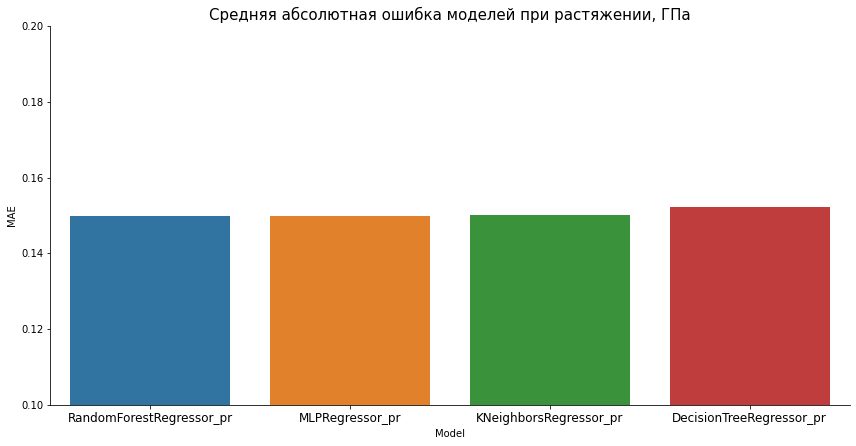

In [330]:
sns.catplot(data=models_sort[0:5], x='Model', y='MAE', kind='bar', height=6, aspect=2)
plt.ylim(ymin=0.1, ymax=0.2)
plt.xticks(size=12)
plt.title('Средняя абсолютная ошибка моделей при растяжении, ГПа', size=15)

Нейронная сеть на Keras. Модель для соотношения матрица-наполнитель

In [270]:
x.shape

(936, 13)

In [275]:
x_mod = x.drop(['Соотношение матрица-наполнитель'], axis=1)
y_mod = x[['Соотношение матрица-наполнитель']]

X_train_mod, X_test_mod, y_train_mod, y_test_mod = train_test_split(x_mod, y_mod, test_size=0.3, random_state=1)
print('X_train_mod:', X_train_mod.shape, 'y_train_mod:', y_train_mod.shape)
print('X_test_mod:', X_test_mod.shape, 'y_test_mod:', y_test_mod.shape)

X_train_mod: (655, 12) y_train_mod: (655, 1)
X_test_mod: (281, 12) y_test_mod: (281, 1)


In [276]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [277]:
X_train_mod_norm = normalizer.adapt(np.array(X_train_mod))

In [278]:
model_mod = keras.Sequential( X_train_mod_norm)

model_mod.add(BatchNormalization())
model_mod.add(Dense(128, activation='relu')),
model_mod.add(Dense(128, activation='relu')),
model_mod.add(Dense(64, activation='relu')),
model_mod.add(Dropout(0.25)),
model_mod.add(Dense(64, activation='relu')),
model_mod.add(Dense(64, activation='relu')),
model_mod.add(Dropout(0.25)),
model_mod.add(Dropout(0.25)),
model_mod.add(Dense(1))

In [279]:
e_stp_mod = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

In [312]:
model_mod.compile(loss='mean_absolute_error',
                 optimizer=tf.keras.optimizers.Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.999), 
                 metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [293]:
print(tf.__version__)

2.8.2


In [429]:
history_mod = model_mod.fit(
    X_train_mod,
    y_train_mod,
    batch_size = 64,
    epochs=100,
    verbose=1,
    validation_data=(X_train_mod, y_train_mod)
        )

Epoch 1/100
11/11 [==============================] - 0s 18ms/step - loss: 0.1501 - root_mean_squared_error: 0.2220 - val_loss: 0.0649 - val_root_mean_squared_error: 0.0904
Epoch 2/100
11/11 [==============================] - 0s 15ms/step - loss: 0.1539 - root_mean_squared_error: 0.2163 - val_loss: 0.0746 - val_root_mean_squared_error: 0.1398
Epoch 3/100
11/11 [==============================] - 0s 18ms/step - loss: 0.1469 - root_mean_squared_error: 0.2301 - val_loss: 0.0663 - val_root_mean_squared_error: 0.1410
Epoch 4/100
11/11 [==============================] - 0s 15ms/step - loss: 0.1548 - root_mean_squared_error: 0.2434 - val_loss: 0.0642 - val_root_mean_squared_error: 0.1328
Epoch 5/100
11/11 [==============================] - 0s 12ms/step - loss: 0.1580 - root_mean_squared_error: 0.2386 - val_loss: 0.0680 - val_root_mean_squared_error: 0.1311
Epoch 6/100
11/11 [==============================] - 0s 11ms/step - loss: 0.1424 - root_mean_squared_error: 0.2243 - val_loss: 0.0803 - val_

In [430]:
model_mod.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 12)               48        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                        

In [431]:
#Функция графика потерь модели на тренировочной и тестовой выборках
def plot_loss(history_mod):
    plt.figure(figsize=(10, 5))
    plt.plot(history_mod.history['loss'])
    plt.plot(history_mod.history['val_loss'])
    plt.title('График потерь модели', size=12)
    plt.ylabel('Среднеквадратичная ошибка', size=12)
    plt.xlabel('Эпоха', size=12)
    plt.legend(['loss', 'val_loss'], loc='best')
    plt.show()

In [432]:
#Функция для построения графика оригинального и предсказанного значения у
def plot_act_pr(original_y, predicted_y):    
    plt.figure(figsize=(15,7))
    plt.title('Тестовые и прогнозные значения', size=12)
    plt.plot(original_y, color='blue', label = 'Тестовые значения')
    plt.plot(predicted_y, color='red', label = 'Прогнозные значения')
    plt.legend(loc='best')
    plt.show()

In [433]:
def metrics_get(model_name, y, y_pred):
    stat = pd.DataFrame()
    stat.loc[model_name, 'MAE'] = metrics.mean_absolute_error(y, y_pred)
    stat.loc[model_name, 'RMSE'] = metrics.mean_squared_error(y, y_pred, squared=False)
    stat.loc[model_name, 'R2'] = metrics.r2_score(y, y_pred) 
    stat.loc[model_name, 'max_error'] = metrics.max_error(y, y_pred) 
    return stat

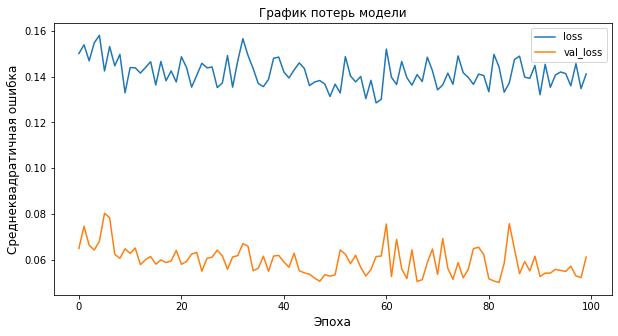

In [434]:
plot_loss(history_mod)

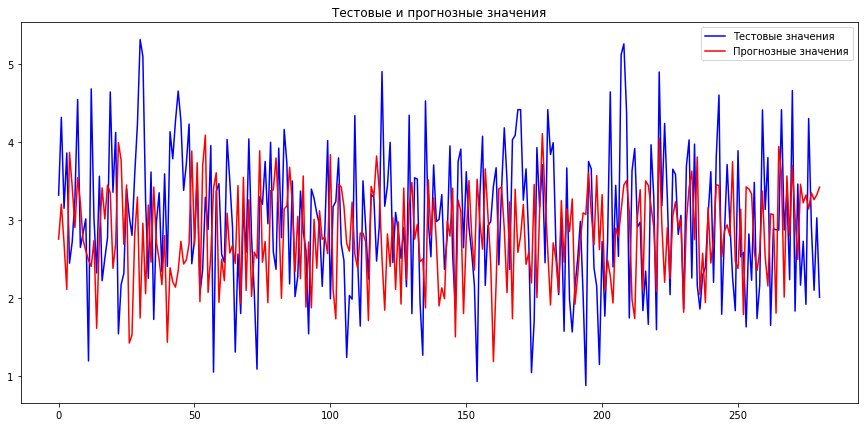

In [435]:
pr_mod = model_mod.predict(np.array((X_test_mod)))
original_mod = y_test_mod.values
predicted_mod = pr_mod

plot_act_pr(original_mod, predicted_mod)

In [449]:
test_results = {}

test_results['model_mod'] = model_mod.evaluate(
     X_train_mod, y_train_mod, verbose=0)

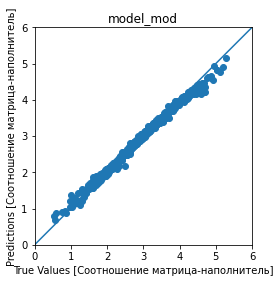

In [450]:
test_predictLM = model_mod.predict(X_train_mod).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_train_mod, test_predictLM)
plt.title('model_mod')
plt.xlabel('True Values [Соотношение матрица-наполнитель]')
plt.ylabel('Predictions [Соотношение матрица-наполнитель]')
lims = [0, 6]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [436]:
stat_mod = pd.DataFrame()
y_pred_test = model_mod.predict(X_test_mod)
y_pred_train = model_mod.predict(X_train_mod)
stat_mod = pd.concat([stat_mod, metrics_get('Соотношение матрица-наполнитель, тренировочный', y_test_mod, y_pred_test)])
stat_mod = pd.concat([stat_mod, metrics_get('Соотношение матрица-наполнитель, тестовый', y_test_mod, y_pred_test)])
stat_mod

MAE      RMSE        R2  \
Соотношение матрица-наполнитель, тренировочный  0.900715  1.095269 -0.462417   
Соотношение матрица-наполнитель, тестовый       0.900715  1.095269 -0.462417   

                                                max_error  
Соотношение матрица-наполнитель, тренировочный   3.572753  
Соотношение матрица-наполнитель, тестовый        3.572753

Провероверка точности.

In [437]:
a2 = np.array(X_train_mod)

In [438]:
model_mod.predict(a2)

array([[4.1330104 ],
       [2.8150299 ],
       [3.129535  ],
       [1.5589247 ],
       [1.1038852 ],
       [4.435089  ],
       [2.706112  ],
       [1.582109  ],
       [1.8628063 ],
       [2.4152057 ],
       [2.079212  ],
       [1.5416214 ],
       [2.9078133 ],
       [3.4877782 ],
       [4.049018  ],
       [1.5245733 ],
       [1.2112852 ],
       [3.598705  ],
       [1.9861853 ],
       [4.032091  ],
       [2.4870622 ],
       [4.2703576 ],
       [2.0930502 ],
       [1.0533295 ],
       [2.6794698 ],
       [4.0310946 ],
       [3.146177  ],
       [2.4967706 ],
       [2.5127587 ],
       [2.2429667 ],
       [2.5678787 ],
       [3.4012973 ],
       [3.11579   ],
       [1.874448  ],
       [1.6268181 ],
       [3.3735476 ],
       [2.0784664 ],
       [2.9883897 ],
       [2.4822168 ],
       [3.745573  ],
       [3.2094364 ],
       [4.6360655 ],
       [2.9915879 ],
       [2.8938963 ],
       [1.766563  ],
       [1.7200668 ],
       [2.920854  ],
       [2.640

In [439]:
a1 = np.array(X_test_mod)

In [440]:
model_mod.predict(a1)

array([[2.7532418],
       [3.2020953],
       [2.6999607],
       [2.1090431],
       [3.8663116],
       [3.4266887],
       [2.9023066],
       [3.5414767],
       [3.2202992],
       [2.7434633],
       [2.6047475],
       [2.482465 ],
       [2.403389 ],
       [2.7343352],
       [1.6088754],
       [2.7801688],
       [3.4117467],
       [3.0129466],
       [3.4464827],
       [3.3460639],
       [2.3786263],
       [2.6984303],
       [3.9932542],
       [3.7686987],
       [2.6867678],
       [3.448741 ],
       [1.4204621],
       [1.5232491],
       [2.8149076],
       [3.2935562],
       [1.7413905],
       [2.9581285],
       [2.0540438],
       [3.1898155],
       [2.458706 ],
       [3.421776 ],
       [2.710362 ],
       [2.4909654],
       [2.1688685],
       [2.797628 ],
       [1.4308614],
       [2.385909 ],
       [2.206508 ],
       [2.1372204],
       [2.3509731],
       [2.7254229],
       [2.4345398],
       [2.4869728],
       [2.6932178],
       [3.8843446],


In [441]:
model_path_mod = 'my_models/model_mod'

In [442]:
model_mod.save(model_path_mod)

INFO:tensorflow:Assets written to: my_models/model_mod/assets


In [443]:
model_mod.save_weights('my_models/model_mod/weights')